## Analyzing best models on Schmitz data

* Illumina bulk RNA-seq, 25,066 genes
* 229 samples
* Just standard pheno variables: IPI variables, ABC/GCB, genetic subtype
* 37% have PFS < 2 (yrs)
* IPI-45 has 65% precision, 12% prevalence

In [1]:
library(patroklos)
setwd("../..")
source("src/assess/ass.R")

generate_plots <- TRUE

data <- readRDS("data/schmitz/data.rds")
data$cohort <- "test"

### A very good RNA-seq only model

In [2]:
# Gauss std @ 2.5
model <- readRDS("models/schmitz/logistic/0-vanilla/zerosum/1-75/models.rds")
for (i in seq(model$split_index)) {
    fit_obj <- model$fits[[i]]
    coefs <- fit_obj$coef[[fit_obj$lambdaMinIndex]]
    rownames(coefs) <- fit_obj$variables.names
    print(coefs[coefs[, 1] != 0, , drop = FALSE])
}

54 x 1 sparse Matrix of class "dgCMatrix"
                             
intercept       -0.2441989656
ENSG00000004799  0.0032726487
ENSG00000058056  0.0198962323
ENSG00000060971 -0.0599317115
ENSG00000065802 -0.0126186016
ENSG00000072121  0.0095156765
ENSG00000090861  0.0409318828
ENSG00000100298  0.0176694701
ENSG00000104267  0.0244728639
ENSG00000105281  0.0534178091
ENSG00000113555 -0.0064227146
ENSG00000116667 -0.0060576808
ENSG00000119950  0.0111076234
ENSG00000121552 -0.0024536531
ENSG00000121933  0.0091115032
ENSG00000122687  0.0023510950
ENSG00000125149  0.0188795796
ENSG00000125633  0.0099005288
ENSG00000127946  0.0167739426
ENSG00000136541 -0.0060835354
ENSG00000137338  0.0006600924
ENSG00000140488  0.0150518675
ENSG00000140848  0.0075823976
ENSG00000146555 -0.0171978604
ENSG00000147454  0.0004706534
ENSG00000148606  0.0294231519
ENSG00000149577  0.0021862217
ENSG00000150076 -0.0121381919
ENSG00000152661 -0.0086515824
ENSG00000154217 -0.0427922160
ENSG00000159176 -0.008924770

Warning message in (function (mapping = NULL, data = NULL, stat = "identity", position = "identity", :
“All aesthetics have length 1, but the data has 537 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in (function (mapping = NULL, data = NULL, stat = "identity", position = "identity", :
“All aesthetics have length 1, but the data has 537 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


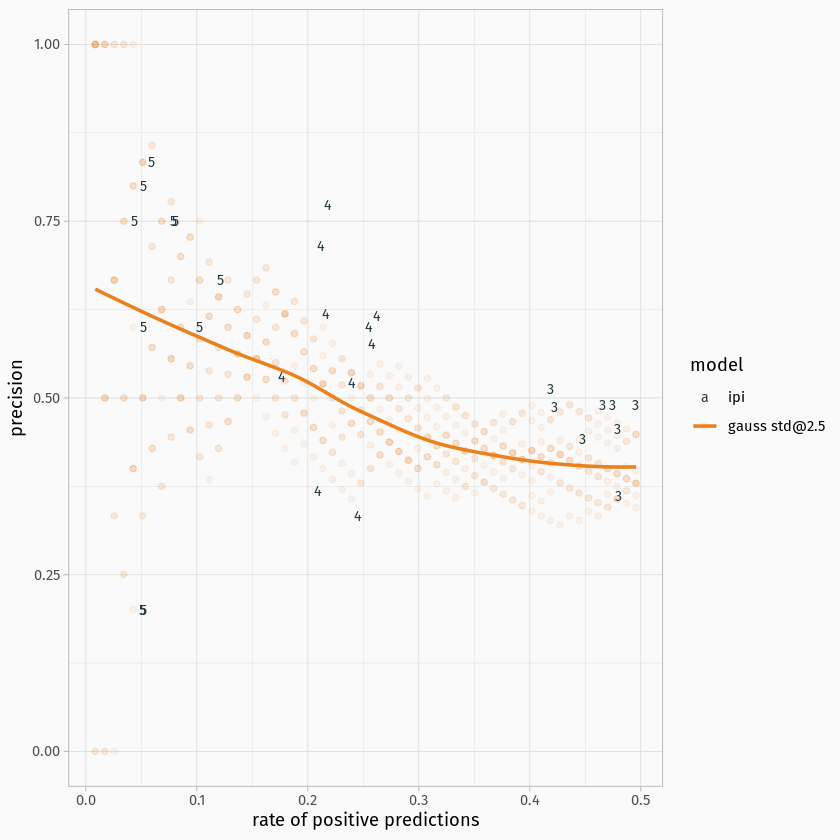

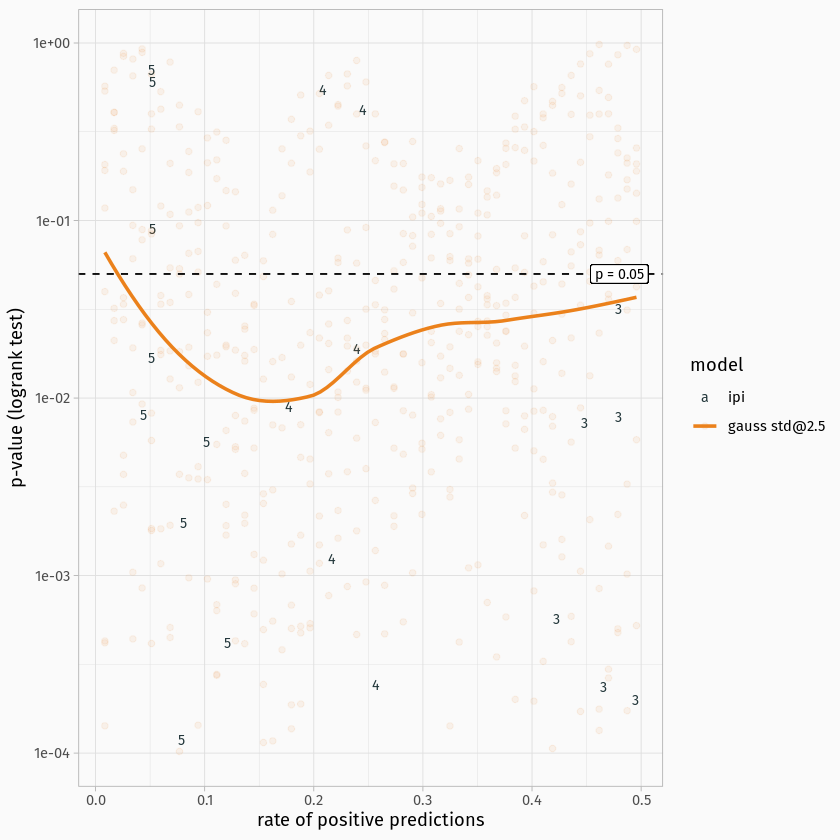

In [3]:
rpp_prec_as2$file <- "results/schmitz/best-of/rna_only_prec.jpeg"
logrank_as2$file <- "results/schmitz/best-of/rna_only_prec_ci.jpeg"
if (generate_plots) {
    rpp_prec_as2$assess(data, model, quiet = TRUE)
    logrank_as2$assess(data, model, quiet = TRUE)
}

### Overall best models

In [4]:
model <- readRDS("models/schmitz/logistic/2-late-int/log-log-pcv-comb-4-all-ipi/1-75/models.rds") 
for (i in seq(model$split_index)) {
    fit_obj <- model$fits[[i]]$model2
    coefs <- fit_obj$coef[[fit_obj$lambdaMinIndex]]
    rownames(coefs) <- fit_obj$variables.names
    print(coefs[coefs[, 1] != 0, , drop = FALSE])
}

19 x 1 sparse Matrix of class "dgCMatrix"
                                                                              
intercept                                                        -9.600153e-01
gender_M&ipi_group_Low++                                         -5.456149e-01
gender_M&bcl2_translocation_seq_1++                              -5.605311e-02
gender_M&ipi_group_Medium&b_symptoms_at_diagnosis_yes++          -5.687293e-01
gender_M&testicular_involvement_no&cns_relapse_yes++              2.309337e+00
ipi_group_Low++                                                  -5.777503e-01
ipi_group_Low&gene_expression_subgroup_GCB++                     -4.386645e-01
ipi_group_Medium++                                               -3.361475e-02
ipi_group_Medium&bcl2_high_expr_1++                              -3.184109e-02
ipi_group_Medium&b_symptoms_at_diagnosis_yes&myc_high_expr_1++   -3.121712e-01
b_symptoms_at_diagnosis_yes&cns_relapse_yes++                     1.087780e+00
b_symptoms

Warning message in (function (mapping = NULL, data = NULL, stat = "identity", position = "identity", :
“All aesthetics have length 1, but the data has 49 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in (function (mapping = NULL, data = NULL, stat = "identity", position = "identity", :
“All aesthetics have length 1, but the data has 49 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


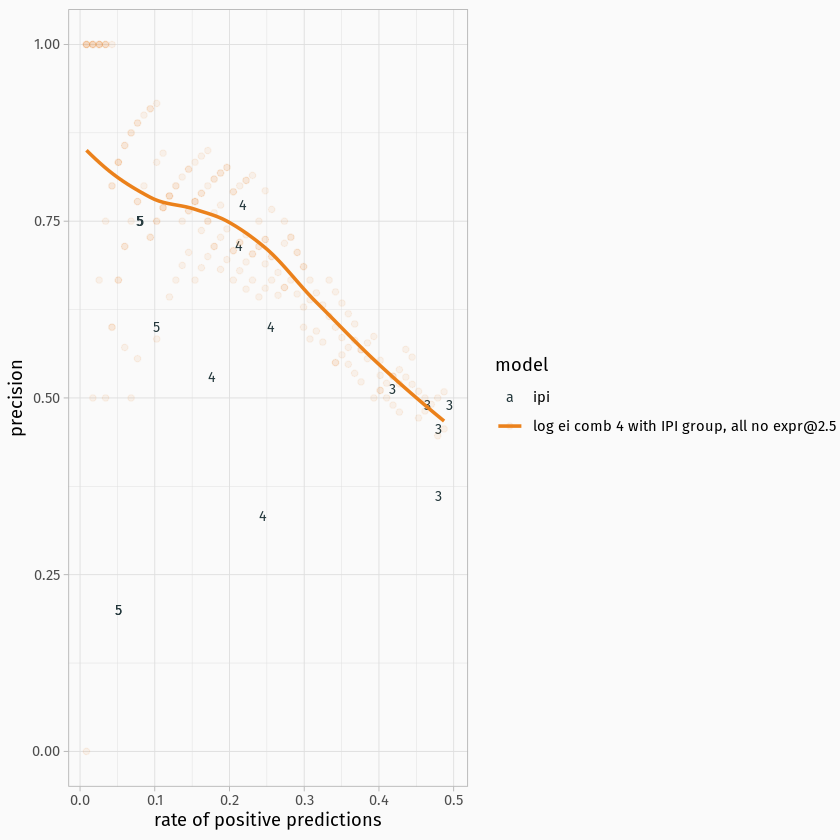

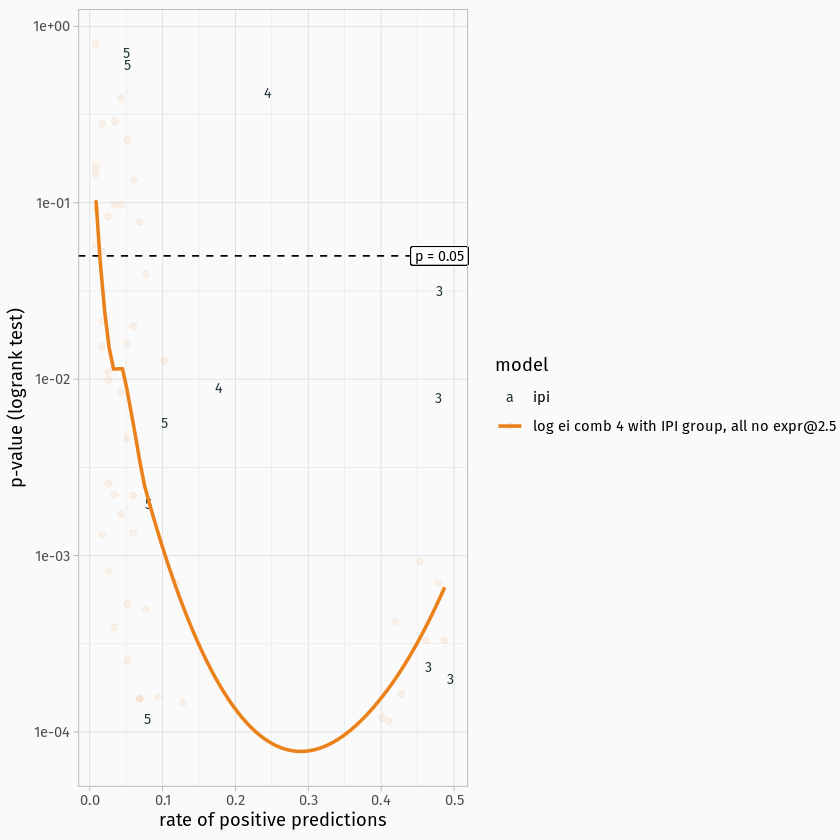

In [5]:
rpp_prec_as2$file <- "results/schmitz/best-of/log_ei4_prec.jpeg"
logrank_as2$file <- "results/schmitz/best-of/log_ei4_prec_ci.jpeg"
if (generate_plots) {
    rpp_prec_as2$assess(data, model, quiet = TRUE)
    logrank_as2$assess(data, model, quiet = TRUE)
}